In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


read the csv

In [3]:
data = pd.read_csv("hotel_booking.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
data.info

<bound method DataFrame.info of                hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27  

In [322]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [323]:
data.shape

(119390, 36)

In [324]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [325]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
data=data.drop(['agent','company'],axis=1)


In [6]:
data=data.dropna()

In [7]:
data.shape

(118898, 34)

In [329]:
data['total_passengers'] = data['adults'] + data['children'] + data['babies'] - data['is_canceled']


List the 5 countries with the most passengers.



In [8]:
count_country=data.groupby(by='country')['name'].count()
count_country=count_country.sort_values(ascending=False)
df_count_country=pd.DataFrame(count_country)

print("The most travelers come from:\n ",count_country[:1])
print("++++++++++++++++++++++++++++++++++++++++++++")
print("\nList the 5 countries with the most passengers.\n",count_country[:5])

The most travelers come from:
  country
PRT    48586
Name: name, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++

List the 5 countries with the most passengers.
 country
PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: name, dtype: int64


Daily Rate ADR

In [331]:
ADR=data.groupby(by='name')['adr'].max()
ADR=ADR.sort_values(ascending=False)
ADR_df = pd.DataFrame(ADR)
print('The most ADR(Average Daily Rate) is:\n',ADR_df.iloc[0])

The most ADR(Average Daily Rate) is:
 adr    5400.0
Name: Daniel Walter, dtype: float64


In [332]:
num_adr=data['adr'].count()
Avg_adr=data['adr'].sum()/num_adr

print('Average of total Average Daily Rate is:', Avg_adr.round(decimals=2))

Average of total Average Daily Rate is: 102.0


max baby and child who booked

In [333]:
max_babies=data['babies'].idxmax()
max_children=data[ 'children'].idxmax()

print(data.iloc[max_children]["name"],
      ", has booked a hotel with the largest number of children.")
print("")
print(data.iloc[max_babies]["name"],
      ", has booked a hotel with the largest number of babies.")

Maxwell Adams , has booked a hotel with the largest number of children.

Johnny Williams , has booked a hotel with the largest number of babies.


In [9]:
max_requests = data['total_of_special_requests'].max()  # القيمة القصوى لعدد الطلبات الخاصة
print(max_requests)
print("#"*50)

df_day = data.groupby(by='phone-number')[['total_of_special_requests','name','email']].first()

for i in range(81503):
    if df_day.iloc[i]['total_of_special_requests'] == 5:
        print(df_day.iloc[i],"\n\n")



5
##################################################
total_of_special_requests                    5
name                               Sarah Floyd
email                        Sarah_F@gmail.com
Name: 100-586-7149, dtype: object 


total_of_special_requests                            5
name                                     Laura Sanders
email                        Sanders_Laura@hotmail.com
Name: 120-754-3942, dtype: object 


total_of_special_requests                         5
name                                 Melinda Jensen
email                        MelindaJensen@zoho.com
Name: 129-892-8585, dtype: object 


total_of_special_requests                     5
name                             Angela Hawkins
email                        Angela_H@gmail.com
Name: 198-157-4544, dtype: object 


total_of_special_requests                              5
name                                     Cynthia Cabrera
email                        Cabrera.Cynthia@xfinity.com
Name: 280-973-9357, dt

In [335]:
print(data['hotel'].unique())
print("***********************************************************")
print(data['deposit_type'].unique())
print("***********************************************************")
data['arrival_date_month'].unique()

['Resort Hotel' 'City Hotel']
***********************************************************
['No Deposit' 'Refundable' 'Non Refund']
***********************************************************


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

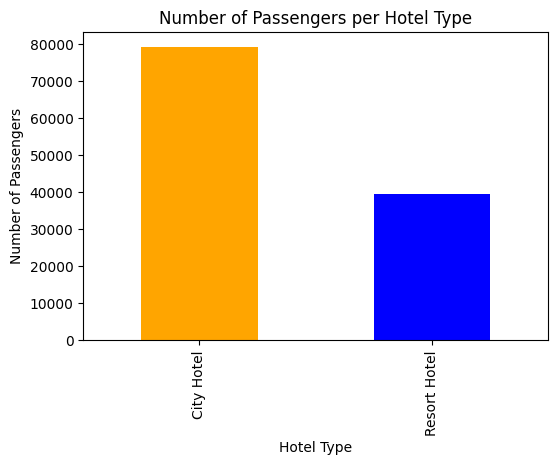

In [336]:
color_list = ['orange', 'blue']

plt.figure(figsize=(6, 4), dpi=100)

data['hotel'].value_counts().plot(kind='bar', color=color_list)

plt.xlabel('Hotel Type')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers per Hotel Type')
plt.show()


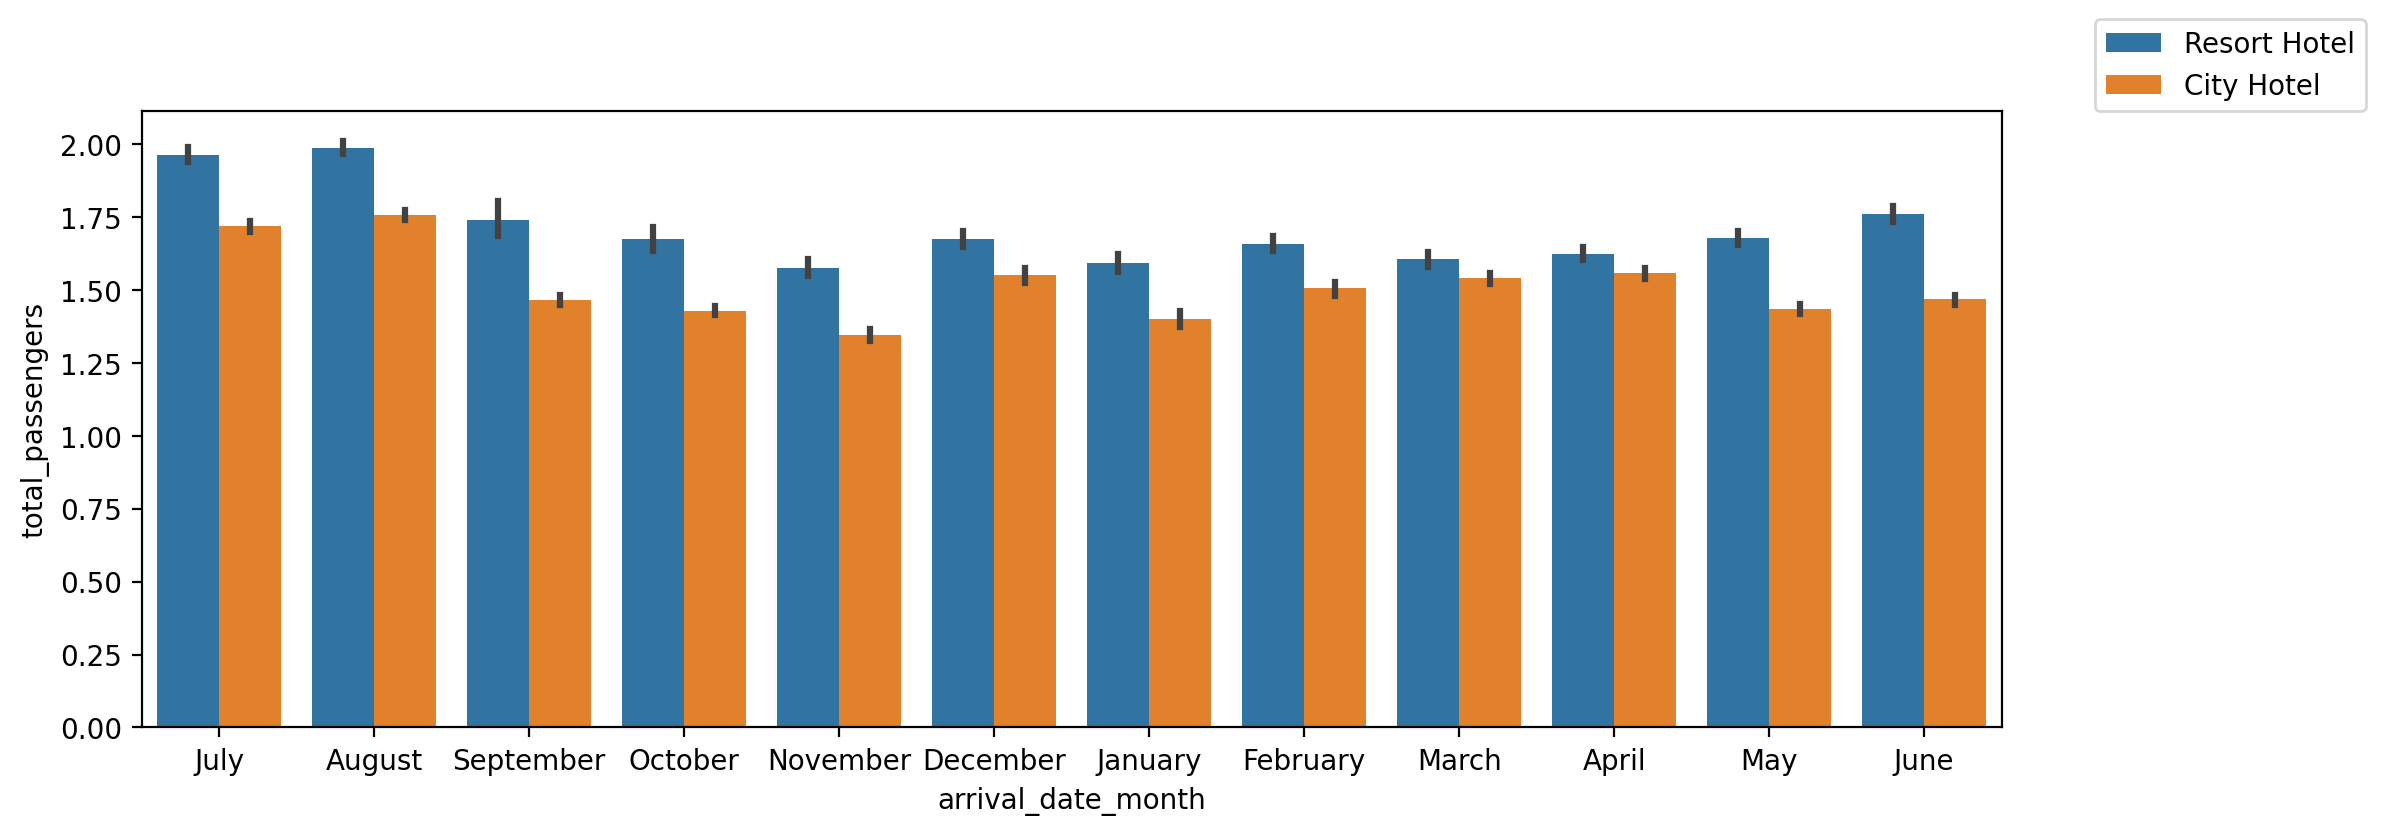

In [337]:
plt.figure(figsize=(12,4), dpi=200)
sns.barplot(x='arrival_date_month', y='total_passengers',hue='hotel' ,data=data)
plt.legend(loc=(1.05, 1))


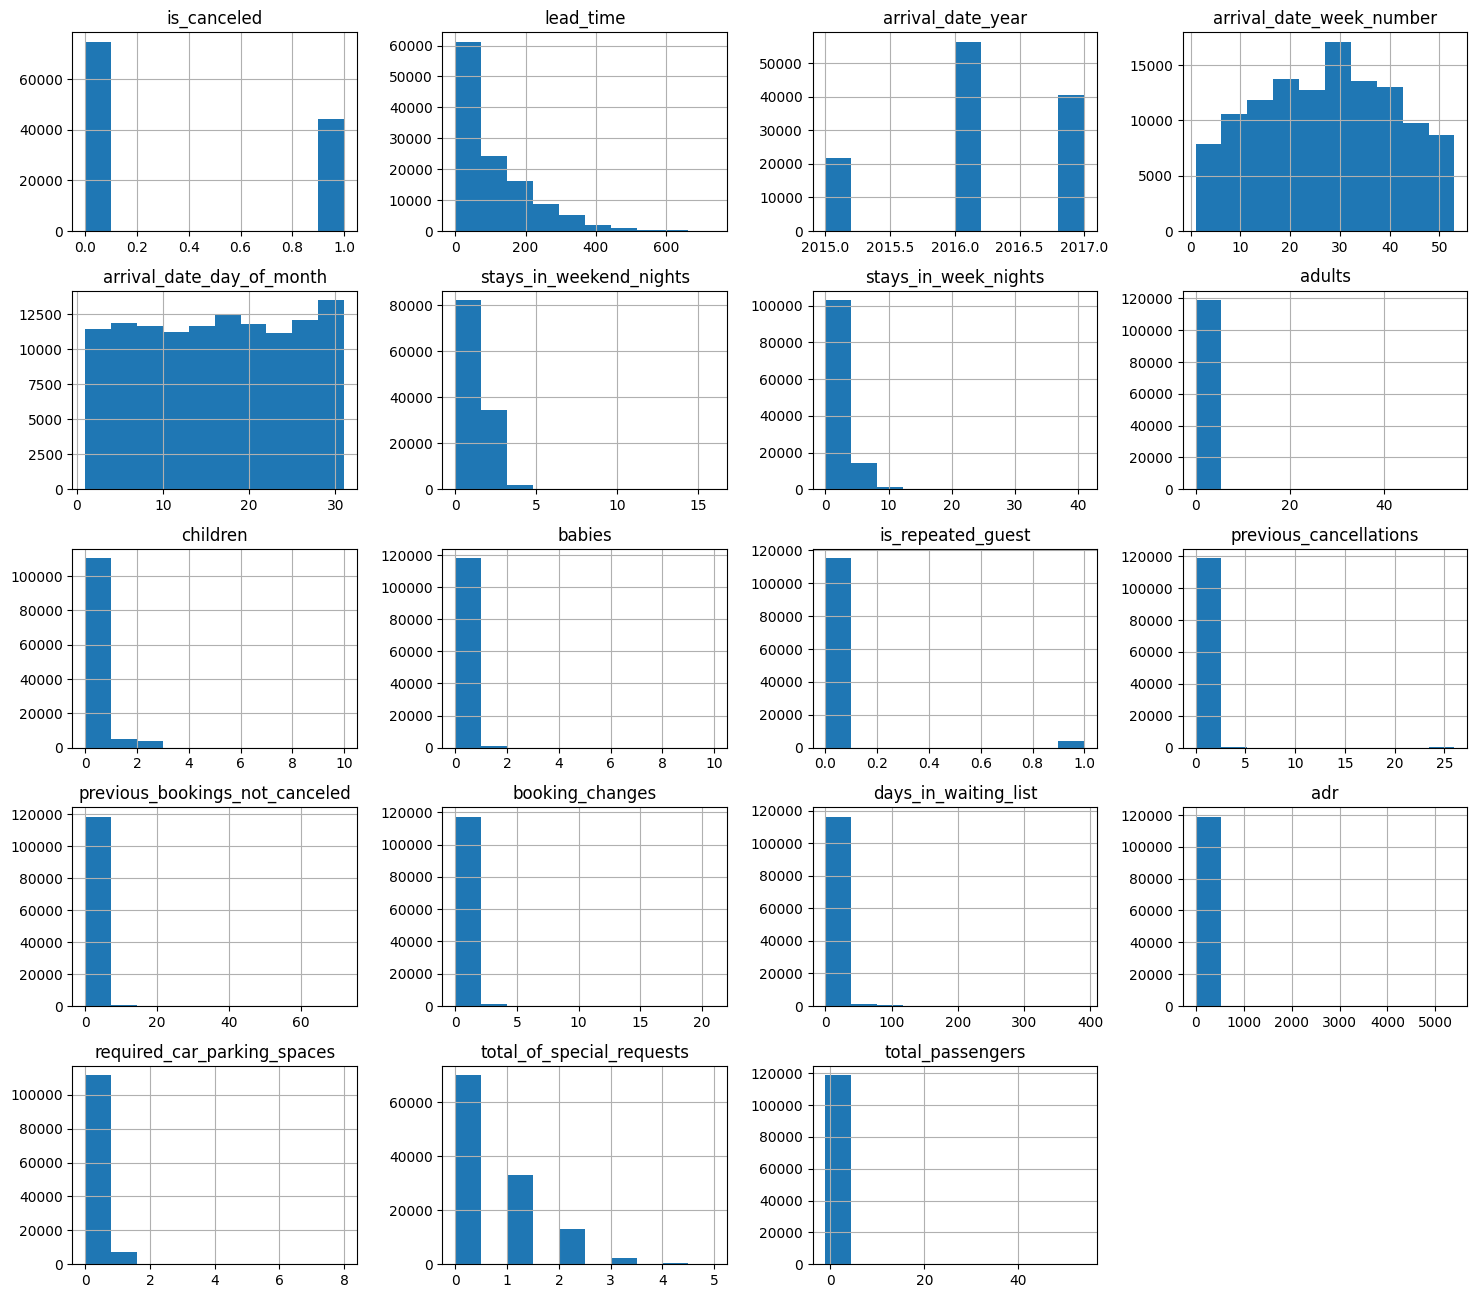

In [338]:
data.hist(figsize=(18,16))
plt.show()

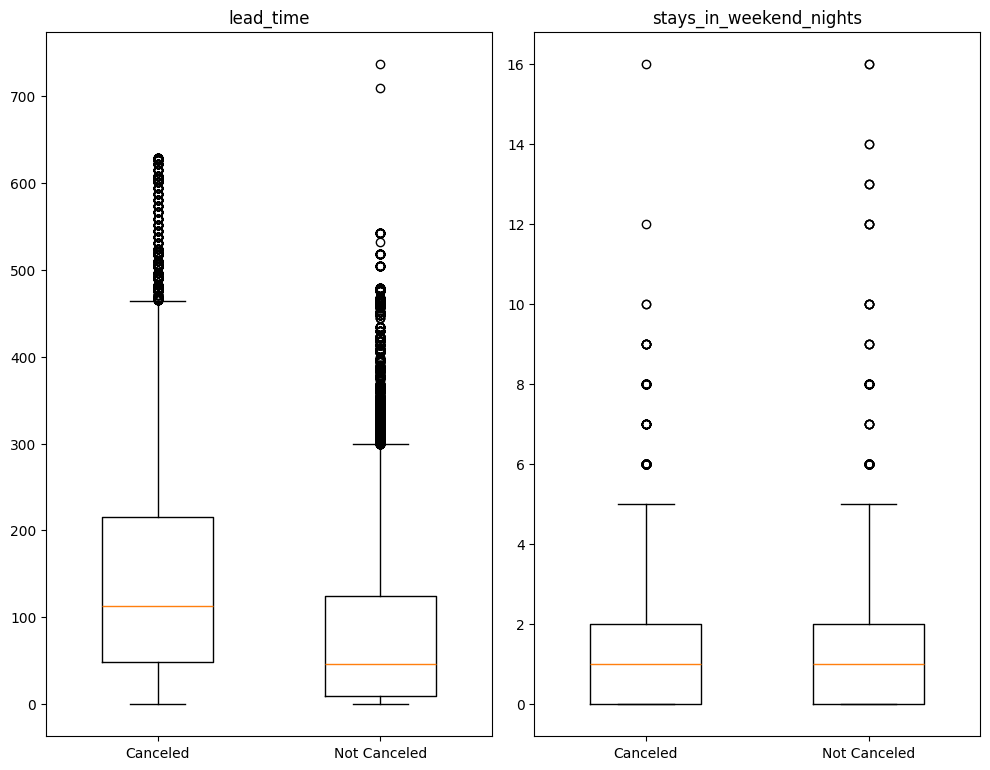

In [339]:
columns_to_plot = ['lead_time', 'stays_in_weekend_nights']

plt.figure(figsize=(10, 15))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data[data['is_canceled'] == 1][column], positions=[1], widths=0.5)
    plt.boxplot(data[data['is_canceled'] == 0][column], positions=[2], widths=0.5)
    plt.xticks([1, 2], ['Canceled', 'Not Canceled'])
    plt.title(column)
plt.tight_layout()
plt.show()


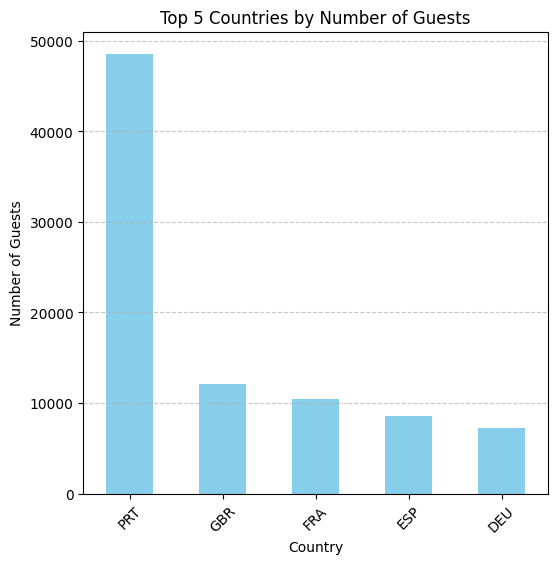

In [340]:
country_counts = data['country'].value_counts().head(5)

plt.figure(figsize=(6, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries by Number of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


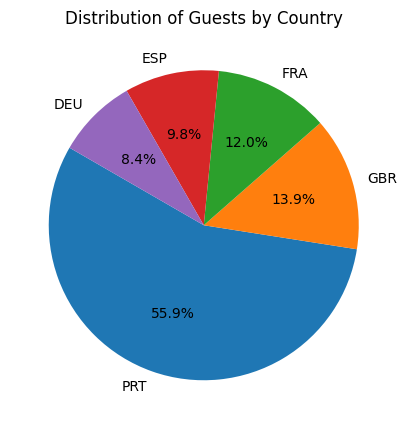

In [341]:
country_counts = data['country'].value_counts().head(5)

plt.figure(figsize=(5, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Guests by Country')
plt.show()


Balancing

In [342]:
# Define features and target variable
X = data.drop(columns=['is_canceled'])
y = data['is_canceled']

# Separate numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the new data shapes after balancing
print("Number of samples after balancing:", X_train_resampled.shape[0])

# Now you can use X_train_resampled and y_train_resampled for model training

Number of samples after balancing: 119788


Feature selection


In [343]:
# معالجة القيم المفقودة
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# ترميز الفئات
categorical_features = data_imputed.select_dtypes(include=['object']).columns
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data_imputed[feature] = label_encoders[feature].fit_transform(data_imputed[feature])

# تحويل البيانات إلى النطاق (MinMaxScaler)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_imputed.drop(columns=['is_canceled']))
scaled_data = pd.DataFrame(scaled_data, columns=data_imputed.drop(columns=['is_canceled']).columns)

# تحديد المتغيرات المستقلة والمتغير المعتمد
X = scaled_data
y = data_imputed['is_canceled']

# تطبيق Univariate Feature Selection
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# عرض الأهمية الإحصائية لكل سمة
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# عرض السمات مع العلامات الإحصائية
print(feature_scores.nlargest(10, 'Score'))


                        Feature         Score
27           reservation_status  19120.573641
21                 deposit_type  11697.368136
1                     lead_time   2246.578311
26    total_of_special_requests   1451.273350
0                         hotel   1423.189096
25  required_car_parking_spaces   1085.438993
12                      country   1058.850209
19           assigned_room_type    887.544109
15            is_repeated_guest    835.050586
16       previous_cancellations    684.123075


# Logistic Regression

In [344]:
# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج الـ Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# التنبؤ بالتصنيفات لمجموعة الاختبار
y_pred = model.predict(X_test)

# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# عرض تقرير الصفوف
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9887300252312868

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14851
           1       1.00      0.97      0.98      8929

    accuracy                           0.99     23780
   macro avg       0.99      0.98      0.99     23780
weighted avg       0.99      0.99      0.99     23780



In [ ]:
#knn

In [ ]:
#random forest 

In [ ]:
#svm

In [ ]:
#dt